In [1]:
# Python program for implementation of Edmonds-Karp algorithm
from collections import defaultdict

# This class represents a directed graph
# using adjacency matrix representation
class Graph:

    def __init__(self, graph):
        self.graph = graph # residual graph
        self.row = len(graph)

    '''
    Return true if there is a path from source 's' to sink 't' in
    a residual graph. Fill parent[] to store the path 
    '''

    def BFS(self, s, t, parent):

        # Mark all the vertices as not visited
        visited = [False] * (self.row)

        # Create a queue for BFS
        queue = []

        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True

        # Standard BFS Loop
        while queue:
            # Dequeue a vertex from queue and print it
            u = queue.pop(0)

            # Get all adjacent vertices of the dequeued vertex u. If a adjacent has not 
            # been visited, then mark it visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    # If we find a connection to the sink node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True

        # We didn't reach sink in BFS starting from source; return false
        return False
    
    # Returns the maximum flow from s to t in the given graph
    def Edmonds_Karp(self, source, sink):

        # This array is filled by BFS and to store path
        parent = [-1] * (self.row)

        max_flow = 0 # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :

            # Find minimum residual capacity of the edges along the path filled by BFS. 
            # Or we can say find the maximum flow through the path found.
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to overall flow
            max_flow += path_flow

            # update residual capacities of the edges and reverse edges along the path
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow
    


    



    
# This code is contributed by Neelam Yadav '''

The maximum flow possible using Edmonds Karp algorithm is 13 
Edmond-Karp time:  0.000997304916381836
The maximum flow possible using Ford Fulkerson is 15 
Ford-Fulkerson time:  0.0
[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 3, 1, 3, 3, 0, 3, 0, 0, 2], [3, 1, 0, 1, 1, 3, 0, 3, 3, 1, 0, 1], [1, 3, 2, 0, 3, 2, 1, 1, 3, 0, 0, 0], [1, 1, 0, 3, 0, 2, 0, 0, 0, 3, 0, 2], [1, 0, 3, 2, 3, 0, 1, 0, 0, 0, 0, 1], [0, 0, 2, 3, 1, 0, 0, 3, 1, 3, 0, 3], [0, 3, 3, 3, 2, 2, 0, 0, 2, 0, 0, 3], [3, 0, 3, 3, 0, 0, 2, 0, 0, 3, 0, 2], [0, 3, 3, 1, 3, 3, 3, 2, 2, 0, 0, 2], [3, 3, 3, 4, 2, 4, 1, 2, 5, 2, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
The maximum flow possible using Edmonds Karp algorithm is 11 
Edmond-Karp time:  0.0
The maximum flow possible using Ford Fulkerson is 11 
Ford-Fulkerson time:  0.0
[[0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0], [2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 3], [1, 2, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 3], [2, 0, 3, 0, 2, 2, 1, 2, 2, 3, 0, 0, 0], [0, 3, 3, 4, 0, 2, 2, 0, 2, 1, 

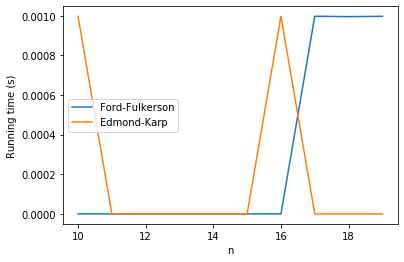

In [4]:
import random
import math
import time
import matplotlib.pyplot as plt



def generate_flow_network(n):
    # create empty graph
    graph = [[0] * (n+2) for i in range(n+2)]
    
    # set capacities for source and sink nodes
    for i in range(n):
        graph[0][i+1] = random.randint(0, math.floor(math.sqrt(n)))
        graph[i+1][n+1] = random.randint(0, math.floor(math.sqrt(n)))
    
    # set capacities for intermediate nodes
    for i in range(n):
        for j in range(n):
            if i != j:
                graph[i+1][j+1] = random.randint(0, math.floor(math.sqrt(n)))
    
    return graph
def ford_fulkerson(network, source, destination):
        
        #Initialization
        nn = len(network)  # node number
        max_flow = 0  # the maximum flow
        pred_node = [-1] * nn  # predecessor node

        while True:
            visited = [0] * nn
            visited[source] = 1

            #Find the augmenting path using DFS
            stack = [source]
            while stack:
                node = stack.pop()
                for next_node, val in enumerate(network[node]):
                    if visited[next_node] == 0 and val > 0:
                        stack.append(next_node)
                        visited[next_node] = 1
                        pred_node[next_node] = node
                        if next_node == destination:
                            break

            #  if there is no augmenting path, the maximum flow is found
            if visited[destination] == 0:
                break

            # Calculate the augmenting flow
            flow = float('inf')
            node = destination
            while node != source:
                flow = min(flow, network[pred_node[node]][node])
                node = pred_node[node]
            max_flow += flow

            #  Update the residual graph
            node = destination
            while node != source:
                network[node][pred_node[node]] += flow
                network[pred_node[node]][node] -= flow
                node = pred_node[node]
        return max_flow

#generating flow networks from 10-19 with an increment of 1, and finding the max flow using Edmonds Karp(BFS) and Ford Fulkerson(DFS) 

y_ff = []
y_ek = []
x = list(range(10, 20))

for n in range(10, 20):
    
        
    G = generate_flow_network(n)
    m= generate_flow_network(n)
    g = Graph(G)
    source = 0; sink = n
    
    start_time = time.time()
    print ("The maximum flow possible using Edmonds Karp algorithm is %d " % g.Edmonds_Karp(source, sink))  
    end_time = time.time()
    print("Edmond-Karp time: ", end_time - start_time)
    y_ek.append(end_time - start_time)

    strt_time = time.time()
    print ("The maximum flow possible using Ford Fulkerson is %d " % ford_fulkerson(m,source, sink))
    nd_time = time.time()
    y_ff.append(nd_time - strt_time)
    print("Ford-Fulkerson time: ", nd_time - strt_time)
    print(G)
plt.plot(x, y_ff, label="Ford-Fulkerson")
plt.plot(x, y_ek, label="Edmond-Karp")
plt.xlabel("n")
plt.ylabel("Running time (s)")
plt.legend()
plt.show()
    


# Conclusion

On an average, after looking at the outputs, we can say that Ford Fulkerson using dfs algorithm is better for getting max flow output. However, It is surprising that Edmond Karp using BFS takes longer to compute compared to Ford Fulkerson using DFS. I believe, the reason behind could be that the graph network we are provide is smaller. Maybe we might find a difference when we increase the size of the graphs. DFS is usually slower because it traverses to the end of the graph first.